In [1]:

from raw_to_dataset import raw_to_dataset, plot_mfcc
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from python_speech_features import mfcc, fbank
import matplotlib.pyplot as plt
import tracemalloc
from scipy import signal
from scipy.fftpack import fft


Version 7


In [2]:
for subdir, dirs, files in sorted(os.walk('bcm_behaviour_data_multi_subject')):
    for file in files:
        if "hdf5" in file:
            print(file)
            print(os.path.join(subdir, file))
            raw_to_dataset(os.path.join(subdir, file),"speed2", da_speed = True)
               

# Cell takes approx 5 min to run    

2022-09-20_15-57-37.hdf5
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-57-37.hdf5
i: 21350
Time: 0.427 s
i: 521347
Time: 10.42694 s
i: 1021344
Time: 20.42688 s
i: 1521341
Time: 30.42682 s
i: 2021339
Time: 40.42678 s
i: 2521336
Time: 50.42672 s
i: 3021333
Time: 60.42666 s
i: 3521330
Time: 70.4266 s
i: 4021327
Time: 80.42654 s
i: 4521324
Time: 90.42648 s
i: 5021084
Time: 100.42168 s
i: 5521081
Time: 110.42162 s
i: 6021078
Time: 120.42156 s
i: 6521075
Time: 130.4215 s
i: 7021072
Time: 140.42144 s
i: 7469096
Time: 149.38192 s
i: 8021066
Time: 160.42132 s
i: 8521064
Time: 170.42128 s
i: 9021061
Time: 180.42122 s
i: 9521058
Time: 190.42116 s
i: 10018479
Time: 200.36958 s
i: 10518476
Time: 210.36952 s
i: 11018473
Time: 220.36946 s
i: 11518470
Time: 230.3694 s
i: 12018467
Time: 240.36934 s
i: 12518464
Time: 250.36928 s
i: 13018461
Time: 260.36922 s
i: 13518459
Time: 270.36918 s
i: 14018456
Time: 280.36912 s
i: 14518453
Time: 290.36906 s
i: 15022377
Time: 300.44754 s
i: 15522374
Time:

In [3]:
# Make a list of all the paths to the folders containing the data

def data_paths():
    path_list = []
    for subdir, dirs, files in sorted(os.walk('bcm_behaviour_data_multi_subject')):
        for dir in dirs:
            if not "subject" in dir:
                if "speed2" in dir:
                    print(f'{subdir}/{dir}')
                    path_list.append(f'{subdir}/{dir}')
    return path_list

paths_np = np.array(data_paths())
np.save('bcm_behaviour_data_multi_subject/paths_speed2.npy', paths_np)
new_list = list(paths_np)
print(new_list)




bcm_behaviour_data_multi_subject/subject1/2022-09-20_14-58-39speed2
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-38-11speed2
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-18-27speed2
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-57-37speed2
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-15-6speed2
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-34-16speed2
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-52-7speed2
bcm_behaviour_data_multi_subject/subject2/2022-11-09_13-56-0speed2
bcm_behaviour_data_multi_subject/subject3/2022-11-09_15-47-1speed2
bcm_behaviour_data_multi_subject/subject3/2022-11-09_16-26-13speed2
bcm_behaviour_data_multi_subject/subject3/2022-11-09_16-7-9speed2
bcm_behaviour_data_multi_subject/subject3/2022-11-09_15-27-14speed2
['bcm_behaviour_data_multi_subject/subject1/2022-09-20_14-58-39speed2', 'bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-38-11speed2', 'bcm_behaviour_data_multi_subject/subject1/2022

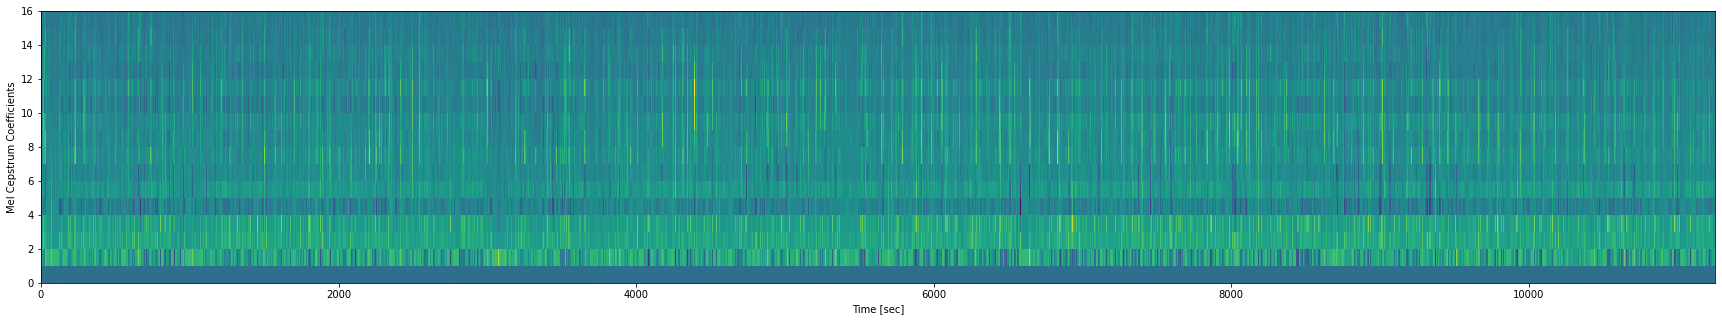

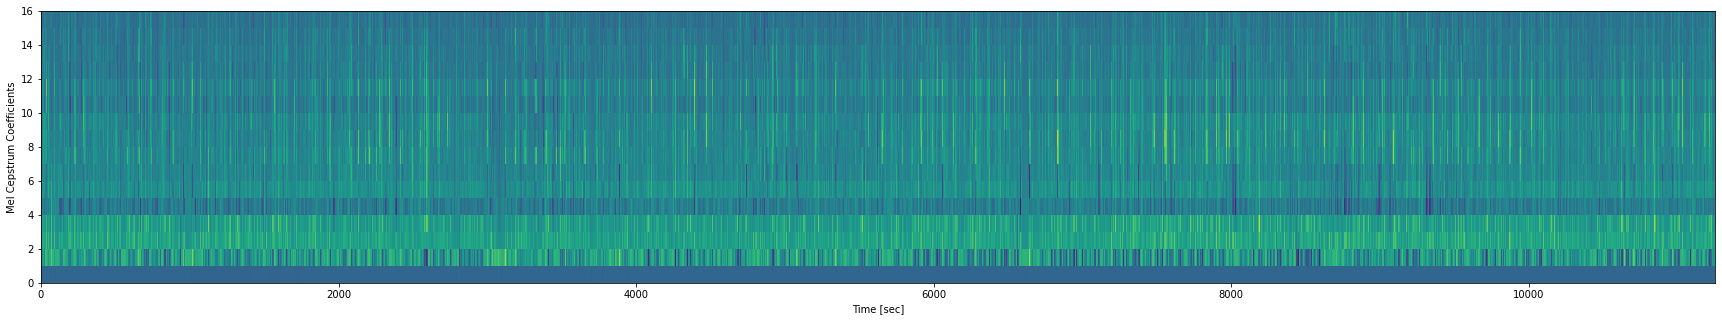

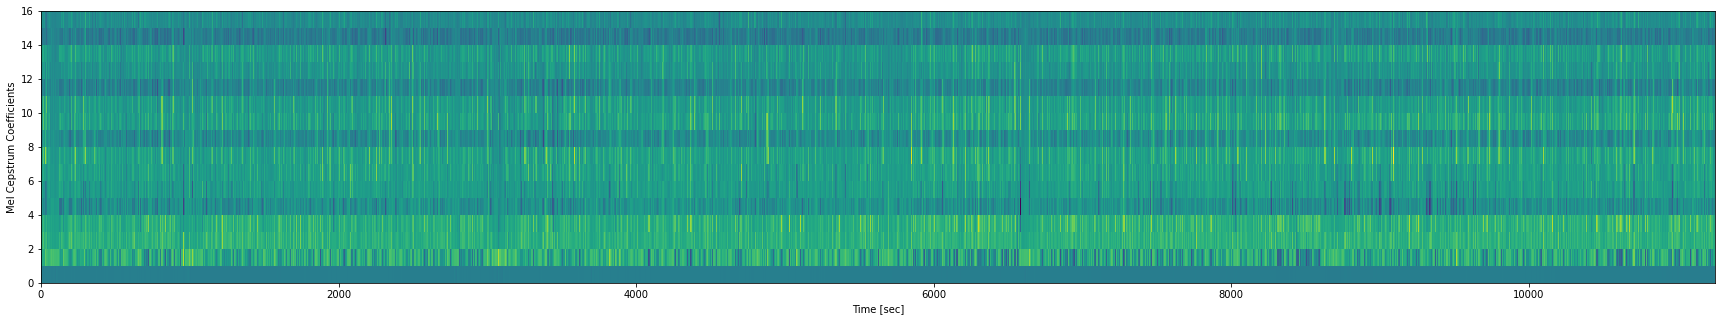

7.427102003990873
7.013819898587531
7.28656807408595


6.53578769057609
6.975486880746446
7.190500477293892


7.15233304735785
7.084377244615191
7.372565600038472


10.11685149491284
12.560624414085696
8.562018803215413


7.332125815938015
7.370988181422048
7.041069861176725


6.64529707122993
6.978495475483578
8.717789120818058


7.240062871003447
7.528732939300567
7.276764263023674


7.1354507180150035
6.404942494365081
6.793821505052222


7.407573753039877
7.265809318007621
7.431236146475522


7.1088192187646895
7.354426134597859
7.411041147110589


7.121239465358178
6.977615431920553
6.959867406668854


7.361916883105874
7.3164540938591225
7.46561194838465


11.222515325275356
7.817199956592095
9.603717471897571


7.902336730057764
8.181936170225114
8.0130644499364


6.925908489122349
6.449959755724422
6.6974702529701275


7.513916591220888
9.864691712209394
7.903405446252309


7.536300783711221
7.593197081203656
7.325879944559279


7.68995757597979
7.886881416647762
7.890923994540

In [4]:
def plot_mfcc(data_mfcc):
    fig = plt.figure(figsize=(30, 5))
    plt.pcolormesh(np.transpose(data_mfcc),shading='auto')
    plt.ylabel('Mel Cepstrum Coefficients')
    plt.xlabel('Time [sec]')
    plt.show()

normal   = np.load('bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-52-7pitch_half_semitone/1.npy')

new_data = np.load('bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-52-7/1.npy')

old_data = np.load('bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-52-7pitch/1.npy')


plot_mfcc(normal[0:])
plot_mfcc(new_data[0:])
plot_mfcc(old_data[0:])

for i in range(100):
    print(np.mean(abs(normal[i+100])))
    print(np.mean(abs(new_data[i+100])))
    print(np.mean(abs(old_data[i+100])))
    print('\n')